In [4]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def read_fasta(file_path):
    labels = []
    sequences = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        label = None
        sequence = ''
        for line in lines:
            if line.startswith('>'):
                if label is not None:
                    labelNew = getOrganismName(label)
                    labels.append(labelNew)
                    sequences.append(sequence)
                label = line.strip()[1:]
                sequence = ''
            else:
                sequence += line.strip()
        if label is not None:
            labelNew = getOrganismName(label)
            labels.append(labelNew)
            sequences.append(sequence)
    return labels, sequences

def getOrganismName(strings):
    return strings.split("|")[-1].split("(")[0].lower()

## Read FASTA

In [5]:
fasta_file = 'dataset.fasta'
labels, sequences = read_fasta(fasta_file)
print(len(labels), "data")

10323 data


## Pre-Processing, extract features using CountVectorizer

In [6]:
vectorizer = CountVectorizer(analyzer='char', lowercase=False)
features = vectorizer.fit_transform(sequences).toarray()
print(vectorizer.get_feature_names_out())
print(features[0])
print(sequences[0])

['A' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T'
 'U' 'V' 'W' 'X' 'Y']
[387 352   0   0   0 487   0   0   0   0   0   0   0   0   0   0   0   0
 313   0   0   0   0]
AAUUGAAGAGUUUGAUCAUGGCUCAGAUUGAACGCUGGCGGCAGGCCUAACACAUGCAAGUCGAACGGUAACAGGAAGAAGCUUGCUUCUUUGCUGACGAGUGGCGGACGGGUGAGUAAUGUCUGGGAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUAAUACCGCAUAACGUCGCAAGACCAAAGAGGGGGACCUUCGGGCCUCUUGCCAUCGGAUGUGCCCAGAUGGGAUUAGCUAGUAGGUGGGGUAACGGCUCACCUAGGCGACGAUCCCUAGCUGGUCUGAGAGGAUGACCAGCCACACUGGAACUGAGACACGGUCCAGACUCCUACGGGAGGCAGCAGUGGGGAAUAUUGCACAAUGGGCGCAAGCCUGAUGCAGCCAUGCCGCGUGUAUGAAGAAGGCCUUCGGGUUGUAAAGUACUUUCAGCGGGGAGGAAGGGAGUAAAGUUAAUACCUUUGCUCAUUGACGUUACCCGCAGAAGAAGCACCGGCUAACUCCGUGCCAGCAGCCGCGGUAAUACGGAGGGUGCAAGCGUUAAUCGGAAUUACUGGGCGUAAAGCGCACGCAGGCGGUUUGUUAAGUCAGAUGUGAAAUCCCCGGGCUCAACCUGGGAACUGCAUCUGAUACUGGCAAGCUUGAGUCUCGUAGAGGGGGGUAGAAUUCCAGGUGUAGCGGUGAAAUGCGUAGAGAUCUGGAGGAAUACCGGUGGCGAAGGCGGCCCCCUGGACGAAGACUGACGCUCAGGUGCGAAAGCGUGGGGAGCAAACAGGAUUAGAUACCCUGGUAGUCCACGCC

## Split Dataset

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1000000)

## SVM

In [8]:
svm = SVC(C=100, gamma=0.01, kernel='rbf')
svm.fit(X_train, y_train)

SVC(C=100, gamma=0.01)

Akurasi menggunakan SVM sebesar 92.83292978208233%
                    precision    recall  f1-score   support

 escherichia coli        0.98      0.91      0.94       525
     homo sapiens        1.00      0.98      0.99       579
     mus musculus        0.85      0.95      0.90       607
rattus norvegicus        0.90      0.82      0.86       354

          accuracy                           0.93      2065
         macro avg       0.93      0.92      0.92      2065
      weighted avg       0.93      0.93      0.93      2065



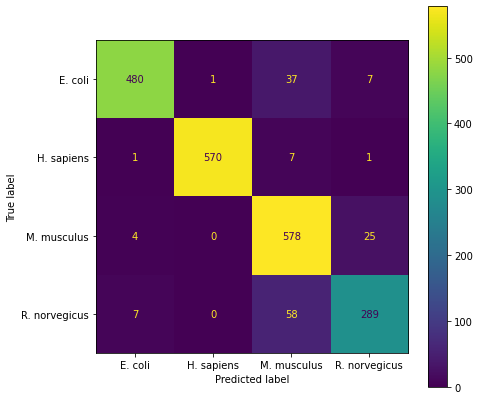

In [9]:
prediction_svm = svm.predict(X_test)
print(f"Akurasi menggunakan SVM sebesar {svm.score(X_test, y_test) * 100}%")
print(classification_report(y_test, prediction_svm))

f,ax = plt.subplots(1,1,figsize=(7,7))
cm_fig = ConfusionMatrixDisplay.from_predictions(y_test, prediction_svm, display_labels=["E. coli", "H. sapiens", "M. musculus", "R. norvegicus"], ax=ax)
plt.show()

## KNN

In [10]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Akurasi menggunakan KNN sebesar 90.65375302663439%
                    precision    recall  f1-score   support

 escherichia coli        0.93      0.94      0.93       525
     homo sapiens        0.98      0.98      0.98       579
     mus musculus        0.87      0.90      0.88       607
rattus norvegicus        0.81      0.76      0.79       354

          accuracy                           0.91      2065
         macro avg       0.90      0.89      0.90      2065
      weighted avg       0.91      0.91      0.91      2065



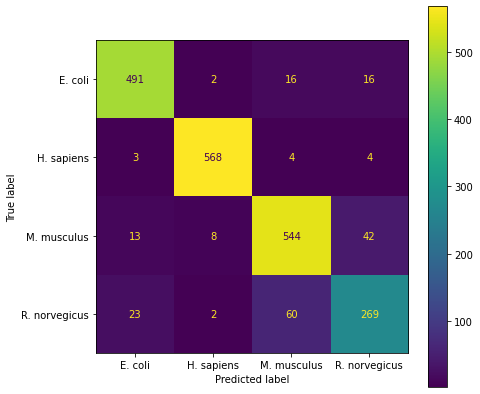

In [11]:
# Memprediksi kelas protein pada data uji
prediction_knn = knn.predict(X_test)

print(f"Akurasi menggunakan KNN sebesar {knn.score(X_test, y_test) * 100}%")
print(classification_report(y_test, prediction_knn))

f,ax = plt.subplots(1,1,figsize=(7,7))
cm_fig = ConfusionMatrixDisplay.from_predictions(y_test, prediction_knn, display_labels=["E. coli", "H. sapiens", "M. musculus", "R. norvegicus"], ax=ax)
plt.show()